## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# 沒有GPU所以設定GPU為無
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.9308 - accuracy: 0.3022 - val_loss: 1.7471 - val_accuracy: 0.3797
Epoch 2/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.7177 - accuracy: 0.3843 - val_loss: 1.6631 - val_accuracy: 0.4038
Epoch 3/100
50000/50000 [==============================] - 10s 201us/step - loss: 1.6145 - accuracy: 0.4247 - val_loss: 1.6110 - val_accuracy: 0.4235
Epoch 4/100
50000/50000 [==============================] - 9s 181us/step - loss: 1.5556 - accuracy: 0.4447 - val_loss: 1.5997 - val_accuracy: 0.4359
Epoch 5/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.5112 - accuracy: 0.4604 - val_loss: 1.5276 - val_accuracy: 0.4578
Epoch 6/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.4688 - accuracy: 0.4768 - val_loss: 1.5002 - val_accuracy: 0.4661
Epoch 7/100
50000/50000 [=============================

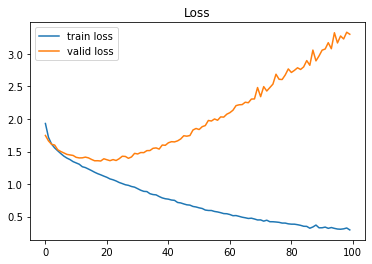

No handles with labels found to put in legend.


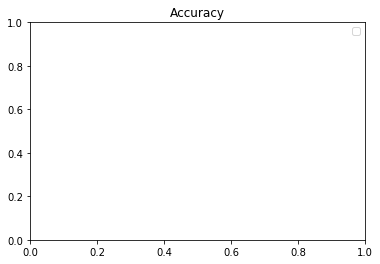

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]



plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()


plt.legend()
plt.title("Accuracy")
plt.show()